CHAIN USING IN LANGGRAPH

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_core.messages import HumanMessage , AIMessage 
from pprint import pprint

messages = [AIMessage(content=f"Please tell me how can I help?", name = "LLM-Model")]
messages.append(HumanMessage(content=f"I want to learn coding",name="Neel"))
messages.append(AIMessage(content=f"Tell me which programming language you want to learn",name="LLM=Model"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLM-Model

Please tell me how can I help?
================================ Human Message =================================
Name: Neel

I want to learn coding
================================== Ai Message ==================================
Name: LLM=Model

Tell me which programming language you want to learn


In [4]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b" , reasoning_format="hidden")
result  = llm.invoke(messages)

In [5]:
def add(a:int , b:int)->int:
    """ Add a and b
    Args:
        a(int): First Integeer
        b(int): Second Integer
    Returns:
        int
    """
    return a + b


In [6]:
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000196D6433A10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000196D642CC90>, model_name='qwen/qwen3-32b', reasoning_format='hidden', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
#Binding tool with llm 
llm_with_tools = llm.bind_tools([add])

llm_with_tools.invoke([HumanMessage(content=f"Hey Whats is 2 plus 2", name=" Neel")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'j9dhv2n2a', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 189, 'prompt_tokens': 189, 'total_tokens': 378, 'completion_time': 0.343034933, 'completion_tokens_details': {'reasoning_tokens': 161}, 'prompt_time': 0.015166351, 'prompt_tokens_details': None, 'queue_time': 0.083535035, 'total_time': 0.358201284}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_d58dbe76cd', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6a39-0386-70e2-acb6-4ad3cd2925ba-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'j9dhv2n2a', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 189, 'output_tokens': 189, 'total_tokens': 378, 'output_token_details': {'reasoning': 161}})

In [ ]:
###Messages as state
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    message: Annotated[list[AnyMessage] , add_messages]

In [9]:
#Tool
def llm_tool(state:State):
    response = llm_with_tools.invoke(state["message"])
    return {"message": response}

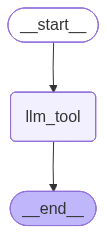

In [11]:
#State graph
from langgraph.graph import StateGraph , START , END
from IPython.display import Image , display
builder = StateGraph(State)

builder.add_node("llm_tool" , llm_tool)
builder.add_edge(START , "llm_tool")
builder.add_edge("llm_tool" , END)


graph_builder = builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
messages = graph_builder.invoke({"message":"What is 2 plus 2"})

messages

{'message': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sstqmght6', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 188, 'total_tokens': 358, 'completion_time': 0.273254695, 'completion_tokens_details': {'reasoning_tokens': 142}, 'prompt_time': 0.007460175, 'prompt_tokens_details': None, 'queue_time': 0.006791105, 'total_time': 0.28071487}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6a46-cd9c-77c1-b51d-efb56918745f-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'sstqmght6', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 188, 'output_tokens': 170, 'total_tokens': 358, 'output_token_details': {'reasoning': 142}})}